# Analysis of the Netflix and IMDB Dataset

**Data Source** 
- [Netflix Datasource](https://www.kaggle.com/shivamb/netflix-shows)
- [IMDB Datasource](https://data.world/datasets/imdb)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import missingno
import seaborn as sns
sns.set_theme(style="white")

import collections
import zipfile
import gzip

# Netflix Dataset Analysis
## Load dataset

In [ ]:
netdf = pd.read_csv('/content/drive/MyDrive/Project ML/Exam/datasets/datasets/netflix_titles.csv')
netdf.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Data Overview
The dataset contains TV shows and movies available on Netflix US.

In [ ]:
netdf.describe(include = 'all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s5536,Movie,Héroes,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


The netflix dataset contains 11 columns, excluding the show_id column.

- There are 8807 entries.
- 

In [ ]:
# types of listing "type"
print(netdf.type.unique())
print('There are 2 types of programs, which is a movie or TV show')

# unique title
unique_titles = len(netdf.title.unique())
print(f'There are {unique_titles} unique titles')

# unique directors
unique_directors = len(netdf.director.unique())
print(f'There are {unique_directors} unique directors')

# unique cast involved in a program
unique_cast = len(netdf.cast.unique())
print(f'There are {unique_cast} unique cast')

#dates added
dates_added = len(netdf.date_added.unique())
print(f'There movies/shows were added in {dates_added} unique dates')

# ratings
unique_ratings = len(netdf.rating.unique())
print(f'There are {unique_ratings} unique ratings')

# duration
unique_duration = len(netdf.duration.unique())
print(f'There are {unique_duration} unique durations')

# different listings
unique_listings = len(netdf.listed_in.unique())
print(f'There are {unique_listings} unique listings')

# We expect each unique movie to have its unique listing
unique_descriptions = len(netdf.description.unique())
print(f'There are {unique_descriptions} unique descriptions.')

# release years
unique_release_year = len(netdf.release_year.unique())
print(f'There are {unique_release_year} unique release year dates')

['Movie' 'TV Show']
There are 2 types of programs, which is a movie or TV show
There are 8807 unique titles
There are 4529 unique directors
There are 7693 unique cast
There movies/shows were added in 1768 unique dates
There are 18 unique ratings
There are 221 unique durations
There are 514 unique listings
There are 8775 unique descriptions.
There are 74 unique release year dates


In [ ]:
print(list(netdf.country.unique()))

['United States', 'South Africa', nan, 'India', 'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia', 'United Kingdom', 'Germany, Czech Republic', 'Mexico', 'Turkey', 'Australia', 'United States, India, France', 'Finland', 'China, Canada, United States', 'South Africa, United States, Japan', 'Nigeria', 'Japan', 'Spain, United States', 'France', 'Belgium', 'United Kingdom, United States', 'United States, United Kingdom', 'France, United States', 'South Korea', 'Spain', 'United States, Singapore', 'United Kingdom, Australia, France', 'United Kingdom, Australia, France, United States', 'United States, Canada', 'Germany, United States', 'South Africa, United States', 'United States, Mexico', 'United States, Italy, France, Japan', 'United States, Italy, Romania, United Kingdom', 'Australia, United States', 'Argentina, Venezuela', 'United States, United Kingdom, Canada', 'China, Hong Kong', 'Russia', 'Canada', 'Hong Kong', 'United States, China, Hong Kong', 'Italy, United 

From the list above, it is not easy to tell the unique country content release as multiple countries were involved in some shows/movies. The order in which they are listed will require preprocessing.

## Columns with missing values

In [ ]:
print(netdf.isna().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


The director, cast, date_added,ratings, and durations are the columns with missing values. The director columns contain the most missing values.

In [ ]:
## Duplicates

# we check the number of unique title if it corresponds with the number of entries
print(len(netdf.show_id.unique()) == len(netdf.title.unique()))

True


Since the number of rows of show_id and titles is equal. there are unique content titles provided. 


In [ ]:
(netdf.release_year.describe())

count    8807.000000
mean     2014.180198
std         8.819312
min      1925.000000
25%      2013.000000
50%      2017.000000
75%      2019.000000
max      2021.000000
Name: release_year, dtype: float64

In [ ]:
# netdf.type.sum().plot.bar(x='content type', y= 'count', rot=45)


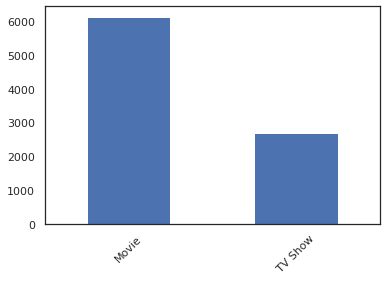

In [ ]:
netdf.type.value_counts().plot.bar(x='content_type', y= 'count', rot=45)
plt.show()

There are more movies than tv shows in the dataset.

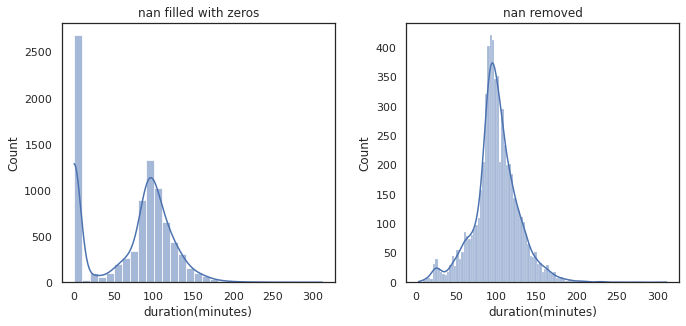

In [ ]:
#5. Distribution of movie duration
# series of movies
movies = netdf.where(netdf.type == 'Movie')
movie_duration = movies.duration
# fill na with 0 minutes
movie_duration1 = movie_duration.fillna(0)
# drop na
movie_duration2 = movie_duration.dropna()
# function to remove the "min" so we get numerical values only
def clean_movie_duration(x):
  if type(x) == int:
    return x
  return int(x.split()[0])

movie_duration1 = movie_duration1.apply(clean_movie_duration)
movie_duration2 = movie_duration2.apply(clean_movie_duration)
# plot distributions of movies by time in minutes
fig, axes= plt.subplots(1, 2, figsize = (10, 5))

axes[0].set_title('nan filled with zeros')
axes[1].set_title('nan removed')
axes[0].set_xlabel('duration(minutes)')
axes[1].set_xlabel('duration(minutes)')
sns.histplot(movie_duration1, kde=True, ax = axes[0])
sns.histplot(movie_duration2, kde = True, ax = axes[1])
fig.tight_layout(pad=2.0)
plt.show()

The first distribution shows the movie duration with nan values set to zero. This caused outliers as we cannot have movies with a zero duration.

In the right distribution plot, we removed the outliers and we can observe that the duration of movies follow a normal distribution.

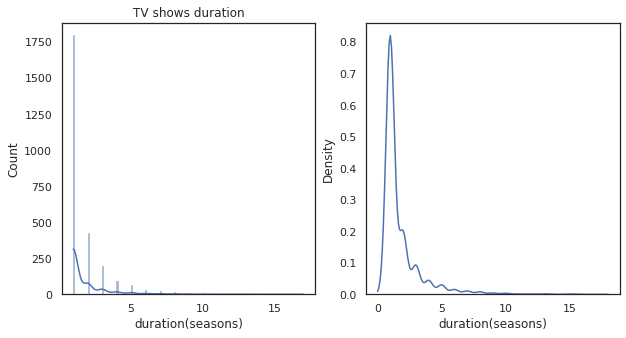

In [ ]:
# 5.Exploring the TV shows distribution

# series of movies
tv_shows = netdf.where(netdf.type == 'TV Show')
tv_shows_duration = tv_shows.duration
# drop na
tv_shows_duration = tv_shows_duration.dropna()
# function to remove the "min" so we get numerical values only
def clean_tv_shows_duration(x):
  if type(x) == int:
    return x
  return int(x.split()[0])

tv_shows_duration = tv_shows_duration.apply(clean_tv_shows_duration)
# plot distributions of movies by time in minutes
fig, axes= plt.subplots(1, 2, figsize = (10, 5))


axes[0].set_title('TV shows duration')
axes[0].set_xlabel('duration(seasons)')
axes[1].set_xlabel('duration(seasons)')
sns.histplot(tv_shows_duration, kde=True, ax = axes[0])
sns.kdeplot(tv_shows_duration, ax = axes[1])
plt.show()

From the kde plot on the right, we can tell the duration of TV shows is positively skewed. 

## Content age on release
To find the age of the content when it is released, we look at date added and release year columns and calculate the difference in years between the two.

In [ ]:
# drop rows where added_year is nan
added_yeardf = netdf.copy()
added_yeardf = added_yeardf[added_yeardf.date_added.isnull() == False]
added_year = added_yeardf.date_added.dropna()
added_year = added_year.apply(lambda x: int(x.split()[-1]))
added_yeardf.date_added = added_yeardf.date_added.apply(lambda x: int(x.split()[-1]))

released_year = added_yeardf.release_year

age = added_year - released_year

In [ ]:
age.describe()

count    8797.000000
mean        4.688417
std         8.786998
min        -3.000000
25%         0.000000
50%         1.000000
75%         5.000000
max        93.000000
dtype: float64

To plot the distribution of the age, we will use a histogram. We first bin the data using 5 as the size of bin, starting from -5, which is close to the minimum age we found of -3, and ending at 95 close to the maximum age.




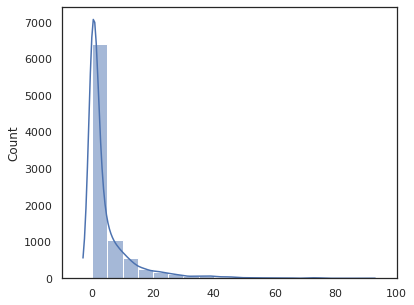

In [ ]:
bin_arr = np.arange(-5, 100, 5)
fig, axes = plt.subplots(1, 1, figsize = (6, 5))
sns.histplot(x = age, bins = bin_arr, kde=True, ax = axes)
plt.show()

The plot shows that most content is added before it is 40 years. We also have content with age less than zero, which means it was added to netflix before it was released. 

Netflix original content can be found if the year it was released is the same as the year it was added. This info is found on the [Netflix website](https://help.netflix.com/en/node/118959).

## Comparing age by content type

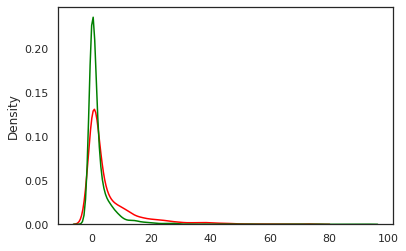

In [ ]:
movie_age = age[added_yeardf.type=='Movie']
tv_show_age = age[added_yeardf.type!='Movie']

sns.kdeplot(movie_age, color = 'red')
sns.kdeplot(tv_show_age, color='green')
plt.show()

From the above distribution, it the age of tv shows seems to be older at the time they were added than the movies.

## Checking Distributution by age/maturity rating

In [ ]:
netdf.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

The following columns will be classified together as they are equivalent, the rating is defined by the release country.
- UR ≡ NR
- TV-MA ≡ R, 
- TV-14 ≡ PG13
- TV-G ≡ G

In [ ]:
# remove rows not showing ratings
clean_ratingdf = netdf.copy()

# classify the content containing nan, 74 min, 84 min, 66 min as unrated
clean_ratingdf.rating = clean_ratingdf.rating.fillna('UR')
def clean_rating(x):
  if 'min' in x:
    return 'UR'
  elif x== 'TV-14':
    return 'PG-13'
  elif x == 'TV-G':
    return 'G'
  elif x == 'NR':
    return 'UR'
  return x

clean_ratingdf.rating = clean_ratingdf.rating.apply(clean_rating)
clean_ratingdf.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-PG', 'TV-Y', 'TV-Y7', 'R', 'G',
       'NC-17', 'UR', 'TV-Y7-FV'], dtype=object)

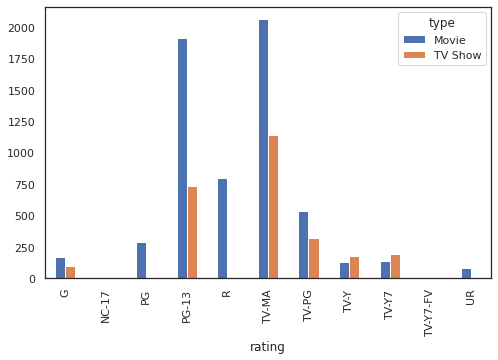

In [ ]:
# sns.distplot(df[(df.Age.notnull()) & (df.Pclass == 1)]['Age'], hist=False, color='blue', label='class 1')
# fig, axes = plt.subplots(figsize = (8, 5))
clean_ratingdf.groupby(['rating', 'type']).size().unstack(level=1).fillna(0.0).plot(kind='bar', figsize=(8, 5))

plt.show()

The above shows, that most movies are not rated. To make a conclusive comparison, we also plot the kde plots.

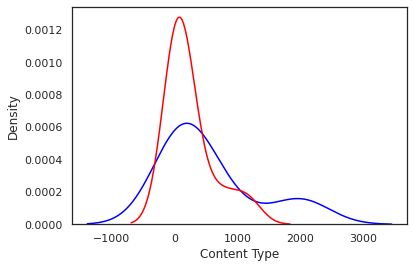

In [ ]:
# sns.distplot(clean_ratingdf[(clean_ratingdf.type == 'Movie')]['rating'], hist=False, color='blue', label='Movie')
rating_comparison = clean_ratingdf.groupby(['rating', 'type']).size().unstack(level=1).fillna(0.0)
fig, axs = plt.subplots()
sns.kdeplot(rating_comparison.Movie, color='blue', label='Movie', ax=axs)
sns.kdeplot(rating_comparison['TV Show'], color='red', label='TV Show', ax=axs)
axs.set_xlabel('Content Type')
plt.show()

The plot shows how the two content types are distributed in relation to each other. The TV shows are more peaked than the Movie ratings

## Genre Distribution

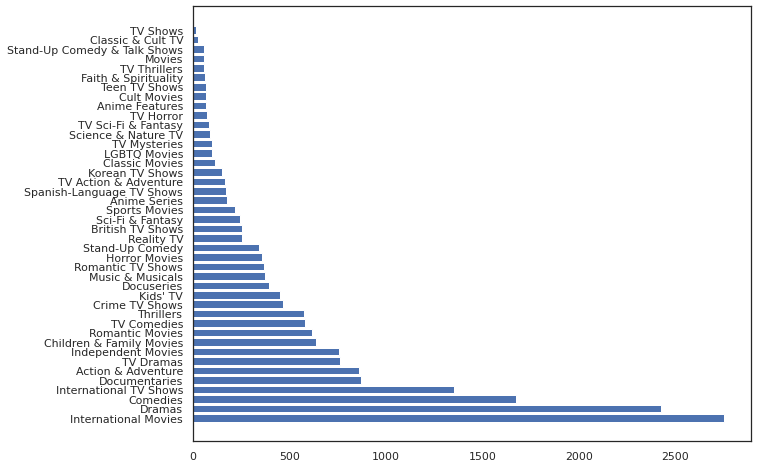

In [ ]:
# available genres
genres_usage = ", ".join(netdf['listed_in']).split(", ")
genres_usage = np.array(genres_usage)
# count occurances of a certain genre
counter = collections.Counter(genres_usage)
counter = collections.OrderedDict(counter.most_common())
# plot distribution
fig, axs = plt.subplots(figsize = (10, 8))
bars = axs.barh(list(counter.keys()), counter.values())
# for bar in bars:
#   width = bar.get_width()
#   label_y = bar.get_y() + bar.get_height() /2
#   plt.text(width, label_y, s=f'{width}')

plt.show()


From the distribution above, the International Movies are the most popular and TV shows are the least popular

## Type of Content added over time

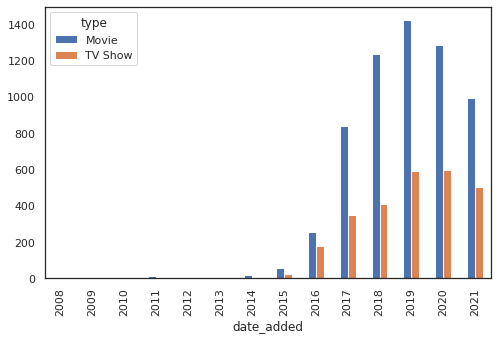

In [ ]:
# count number of movies and tv shows added per year
# tv_add = added_yeardf[added_yeardf.type=='TV Show'].date_added.value_counts()
# movie_add = added_yeardf[added_yeardf.type== 'Movie'].date_added.value_counts()

# comparing shows added per year vs movies added per year
dates_compare_ser = added_yeardf.groupby(['date_added', 'type']).size().unstack(level=1).fillna(0.0)
# added_yeardf.groupby(['date_added', 'type']).size().unstack(level=1).plot(kind='bar', figsize=(8, 5))
dates_compare_ser.plot(kind='bar', figsize=(8, 5))

In many years, the number of movies added per year is greater than the number of tv shows added. We show the changes over time below using the total number of movies added so far.

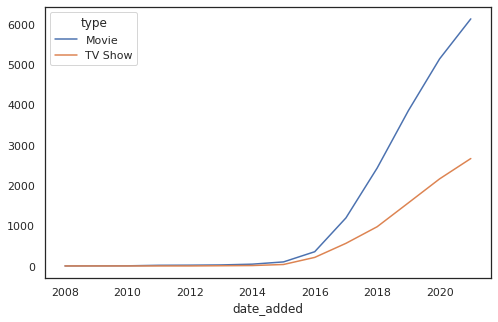

In [ ]:
# comparing the total number of shows and total number of movies added.

dates_compare_ser.sort_index().cumsum().plot(kind='line', figsize = (8, 5))
plt.show()

The number of movies added were close from 2008 to 2015. From 2016, more movies were added than TV shows.

## Most content added per week

To find the week with the most content, we first convert the date_add column type to datetime. This will allow us to express the dates in weeks easly.

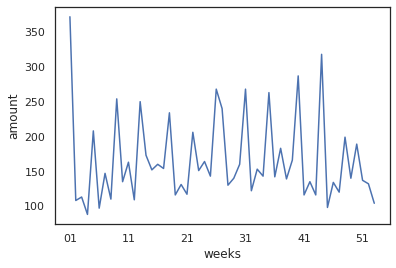

In [ ]:
from datetime import date
from datetime import datetime
import calendar

added_dates = netdf.date_added.dropna()

months_dict = {month: index for index, month in enumerate(calendar.month_name) if month}

def clean_dates2(x):
  x = x.replace(',','')
  d = x.split()
  month = int(months_dict[d[0]])
  day = int(d[1])
  year = int(d[2])
  dt_tmp = date(year, month, day)
  return dt_tmp

added_dates = added_dates.apply(clean_dates2)
week_series = added_dates.apply(lambda x: x.strftime('%V'))

frame = {'added_dates': added_dates, 'weeks':week_series}
date_df = pd.DataFrame(frame)
week_counts = date_df.groupby(['weeks']).size()
week_counts.plot(ylabel='amount')

The most content is uploaded in January. 

# IMDB Dataset Analysis

The netflix dataset provides basic information on movies and tv shows. It does not provide the information about popularity of the content(ratings). We use IMDB for such, and we will merge both datasets with an intention of finding the popularity and ratings of movies.

In [1]:
# prepare dataset
# remove tv shows from netflix dataframe
net_moviesdf = netdf[netdf.type=='Movie'].reset_index(drop=True)
net_moviesdf.describe()

NameError: name 'netdf' is not defined

# Joining the datasets

In [ ]:

# import all imdb data related to see which joins we can perform on it only

#1. name basics
ititles_path = '/content/drive/MyDrive/Project ML/Exam/datasets/datasets/name.basics_small.tsv.gz'
with gzip.open(ititles_path,   'r') as z:
  ititles_df = pd.read_csv(z, sep='\t')
ititles_df.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0072308,tt0053137,tt0050419,tt0031983"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0037382,tt0038355,tt0071877,tt0117057"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0056404,tt0054452,tt0049189,tt0057345"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0080455,tt0078723,tt0077975,tt0072562"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050986,tt0060827,tt0083922,tt0050976"


In [ ]:
#2. iratings
iratings_path = '/content/drive/MyDrive/Project ML/Exam/datasets/datasets/title.ratings_small.tsv.gz'
with gzip.open(iratings_path,   'r') as z:
  iratings_df = pd.read_csv(z, sep='\t')
iratings_df.head()

,tconst,averageRating,numVotes
0,tt0000004,6.0,153
1,tt0000020,5.0,319
2,tt0000023,5.7,1293
3,tt0000031,5.5,936
4,tt0000051,3.8,32


In [ ]:
# 3. inames
ititles2_path = '/content/drive/MyDrive/Project ML/Exam/datasets/datasets/title.basics_small.tsv.gz'
with gzip.open(ititles2_path,   'r') as z:
  ititles2_df = pd.read_csv(z, sep='\t')
ititles2_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt11394180,movie,Dick Johnson Is Dead,Dick Johnson Is Dead,0,2020,0,89,"Documentary,Drama"
1,tt5973706,movie,The Wake of Dick Johnson,The Wake of Dick Johnson,0,2016,0,74,Drama
2,tt3172066,tvEpisode,Jack Johnson,Jack Johnson,0,2013,0,22,"Comedy,News,Talk-Show"
3,tt0065906,movie,Jack Johnson,Jack Johnson,0,1970,0,90,"Documentary,Sport"
4,tt13604988,tvSeries,Johnson,Johnson,0,2021,0,30,"Comedy,Drama"


In [ ]:
# we can use the ititle2 and the ratings to get the movie name rating.

# leave movies only
ititles2_df = ititles2_df[ititles2_df.titleType =='movie']

# join ititle2_df with the iratings_df
idf = pd.merge(iratings_df, ititles2_df, on= 'tconst')
idf.head()

,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000862,5.1,16,movie,Faldgruben,Faldgruben,0,1909,0,0,0
1,tt0000992,4.8,15,movie,De onde Veje,De onde Veje,0,1909,0,0,0
2,tt0001038,4.0,20,movie,Sherlock Holmes VI,Sherlock Holmes VI,0,1910,0,0,0
3,tt0001586,3.8,16,movie,A Dog's Tale,A Dog's Tale,0,1911,0,0,0
4,tt0002186,6.3,110,movie,The Flying Circus,Den flyvende cirkus,0,1912,0,46,Drama


In [ ]:
# join the idf with the netflix dataset
net_moviesdf.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
2,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
3,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
4,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


In [ ]:
full_df1 = pd.merge(net_moviesdf, idf, left_on='title', right_on='primaryTitle')
full_df1 = full_df1.drop_duplicates()
full_df1.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",tt11394180,7.4,5870,movie,Dick Johnson Is Dead,Dick Johnson Is Dead,0,2020,0,89,"Documentary,Drama"
1,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,tt10101702,6.9,2702,movie,My Little Pony: A New Generation,My Little Pony: A New Generation,0,2021,0,90,"Adventure,Animation,Comedy"
2,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",tt0108041,7.0,617,movie,Sankofa,Sankofa,0,1993,0,125,Drama
3,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,tt5164438,6.3,9145,movie,The Starling,The Starling,0,2021,0,102,"Comedy,Drama"
4,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,tt9205538,5.4,613,movie,Je Suis Karl,Je Suis Karl,0,2021,0,126,"Drama,Romance,Thriller"


In [ ]:
full_df1.describe()

,release_year,averageRating,numVotes,isAdult,startYear,endYear,runtimeMinutes
count,5203.000000,5203.000000,5.203000e+03,5203.000000,5203.000000,5203.0,5203.000000
mean,2012.790313,6.228022,3.509436e+04,0.000192,2008.964251,0.0,103.628291
std,9.961308,1.140733,1.143808e+05,0.013864,31.689403,0.0,25.484038
min,1944.000000,1.400000,5.000000e+00,0.000000,0.000000,0.0,0.000000
25%,2011.000000,5.600000,3.810000e+02,0.000000,2007.000000,0.0,90.000000
50%,2016.000000,6.400000,2.333000e+03,0.000000,2015.000000,0.0,100.000000
75%,2018.000000,7.000000,1.622750e+04,0.000000,2018.000000,0.0,116.000000
max,2021.000000,9.100000,2.193013e+06,1.000000,2021.000000,0.0,252.000000


We did not get the ratings of all the movies, as the number of movies in the netflix dataset was 6131. We were able to obtain the ratings for 5203 movies, which is 84% of the dataset.